In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from generation.train.autoencoder import AutoEncoder, run_train, generate_new_signal
from generation.data.data_simulation import Nakagami
from generation.data.dataset_pytorch import SignalsDataset

In [2]:
# Data params
SAMPLE_SIZE = 1000
Q_LOWER = 0.001
Q_UPPER = 0.999
NU_MIN = 0.9
NU_MAX = 1.2
NU_STEP = 0.005

nakagami = Nakagami(SAMPLE_SIZE, Q_LOWER, Q_UPPER)
nu_values = np.arange(NU_MIN, NU_MAX, NU_STEP)
data = nakagami.get_nakagami_data(nu_values)

In [3]:
# Train params
NUM_EPOCHS = 200
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
PRINT_EACH = 20
VERBOSE = 1
NO_SAVE = True


dataset = SignalsDataset(data)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
model = AutoEncoder(SAMPLE_SIZE)

In [4]:
run_train(model, dataloader, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE)

epoch [1/200], loss:0.1300
epoch [21/200], loss:0.0166
epoch [41/200], loss:0.0029
epoch [61/200], loss:0.0013
epoch [81/200], loss:0.0010
epoch [101/200], loss:0.0009
epoch [121/200], loss:0.0009
epoch [141/200], loss:0.0009
epoch [161/200], loss:0.0009
epoch [181/200], loss:0.0009


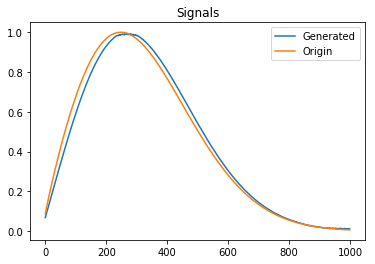

In [5]:
new_signal = generate_new_signal(model, dataset, samples_num=20)
plt.title("Signals")
plt.plot(new_signal)
plt.plot(dataset[np.random.choice(len(dataset))])
plt.legend(['Generated', 'Origin'])
plt.show()